In [65]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X,y=df.values[:,:-1],df.values[:,-1]

In [72]:
# ensure all data are floating point values
X=X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [79]:
# split into train and test datasets
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(235, 34) (116, 34) (235,) (116,)


In [101]:
# determine the number of input features
n_features=X_train.shape[1]

In [87]:
# define model
model=Sequential()
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'
                ,input_shape=(n_features,)))
model.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

In [88]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
#Fit the model
model.fit(X_train,Y_train,epochs=150,batch_size=32,verbose=0)

In [90]:
#Evaluate the model
loss, acc = model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.2819 - accuracy: 0.8966


In [94]:
#Make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat=model.predict([row])
print('Predicted: %.3f' %yhat)

Predicted: 0.989


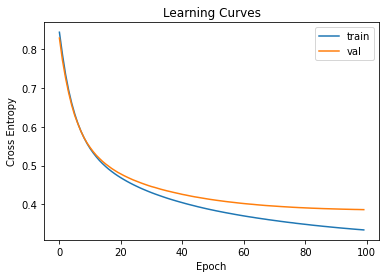

In [105]:
from sklearn.datasets import make_classification
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
hist = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [107]:
[i for i in range(10,40,10)]

[10, 20, 30]